# TODO
* See by day type, if it is a good categorization
* Try different day type categorization
* Regarder gares qui ont grosses anomalies en intensité et non en fréquence cf DataPreprocessing
* Code average model

In [1]:
from PandasToolsFunction import *

# Charger les données d'entraînement
trainf_data = pd.read_csv('train_f_x.csv')
y_train_data = pd.read_csv('y_train_sncf.csv')

train_data = trainf_data
train_data['y'] = y_train_data['y']
train_data['date'] = pd.to_datetime(train_data['date'])


existing_column_index = train_data.columns.get_loc('date')
# Use the insert method to add the new column after the existing column
train_data.insert(existing_column_index + 1, 'day_name', train_data['date'].dt.day_name())

print(train_data.head())

        date  day_name station  job  ferie  vacances   y
0 2015-01-01  Thursday     1J7    1      1         1   7
1 2015-01-01  Thursday     O2O    1      1         1   0
2 2015-01-01  Thursday     8QR    1      1         1   9
3 2015-01-01  Thursday     UMC    1      1         1   9
4 2015-01-01  Thursday     FK3    1      1         1  28


/Users/gurvanrichardeau/Library/CloudStorage/GoogleDrive-gurvan.richardeau@gmail.com/My Drive/UNIVERSITE/MVAmaterials/Projet_SCNF/PandasToolsFunction.py:145: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_df = new_df[station_filter]
/Users/gurvanrichardeau/Library/CloudStorage/GoogleDrive-gurvan.richardeau@gmail.com/My Drive/UNIVERSITE/MVAmaterials/Projet_SCNF/PandasToolsFunction.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[day_name_col] = pd.Categorical(df[day_name_col], categories=custom_day_order, ordered=True)


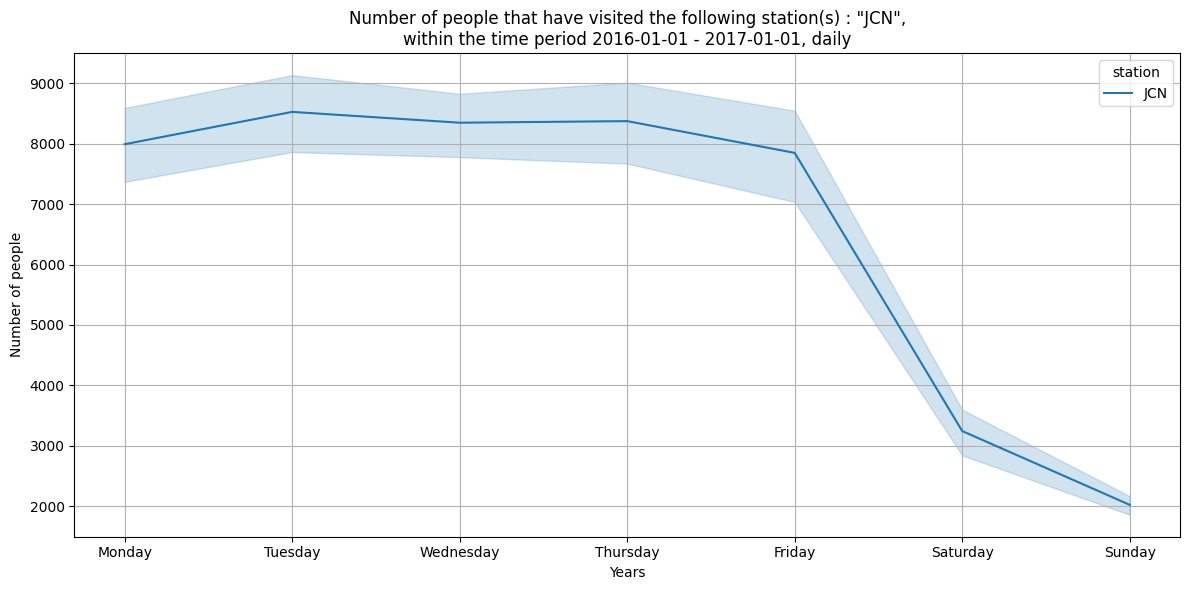

Count per day type for the following stations JCN
Time period : 2016-01-01 - 2017-01-01
job : 261
ferie : 12
vacances : 124
total = 397


In [4]:
_, _ = display_by_station(train_data, 1, '2016-01-01', '2017-01-01', seed=None, display_mode='per_day_of_week') 

In [168]:
print(len(train_data))
# Afficher les premières lignes du jeu de données
print("Jeu de données d'entraînement :")
print(train_data.head())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives du jeu de données d'entraînement :")
print(train_data.describe())

1229863
Jeu de données d'entraînement :
        date  day_name station  job  ferie  vacances   y dated_day_name
0 2015-01-01  Thursday     1J7    1      1         1   7           Th-1
1 2015-01-01  Thursday     O2O    1      1         1   0           Th-1
2 2015-01-01  Thursday     8QR    1      1         1   9           Th-1
3 2015-01-01  Thursday     UMC    1      1         1   9           Th-1
4 2015-01-01  Thursday     FK3    1      1         1  28           Th-1

Statistiques descriptives du jeu de données d'entraînement :
                                date           job         ferie   
count                        1229863  1.229863e+06  1.229863e+06  \
mean   2018-12-29 15:14:03.275389440  7.171587e-01  2.986105e-02   
min              2015-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2016-12-30 00:00:00  0.000000e+00  0.000000e+00   
50%              2018-12-21 00:00:00  1.000000e+00  0.000000e+00   
75%              2021-01-04 00:00:00  1.000000e+00  0.0000

In [174]:
def count_per_day_type( df: pd.DataFrame,
                        start_date: str = None, end_date: str = None, 
                        date_col ='date', stations = None, station_column = 'stations',
                        day_types = ['job', 'ferie', 'vacances'] 
                        ):
    
    new_df = df.copy()

    if start_date is not None or end_date is not None :
        period_filter = make_date_filter(new_df, start_date, end_date, date_col)
        new_df = new_df[period_filter]
    if stations is not None :
        station_filter, stations = make_station_filter(df, stations, station_column)
    total = 0

    print(f"Time period : {start_date} - {end_date}")
    for col in day_types :
        value =  new_df[col].value_counts()[1]
        total+=value
        print(f"{col} : {value}")

    print(f"{total = }")

In [175]:
count_per_day_type(train_data, '2016-01-01', '2017-01-01')

Time period : 2016-01-01 - 2017-01-01
job : 111176
ferie : 5101
vacances : 52457
total = 168734


In [19]:
train_data

,date,station,job,ferie,vacances
0,2015-01-01,1J7,1,1,1
1,2015-01-01,O2O,1,1,1
2,2015-01-01,8QR,1,1,1
3,2015-01-01,UMC,1,1,1
4,2015-01-01,FK3,1,1,1
...,...,...,...,...,...
1229858,2022-12-31,V2P,0,0,1
1229859,2022-12-31,N9K,0,0,1
1229860,2022-12-31,P6E,0,0,1
1229861,2022-12-31,BDC,0,0,1


In [4]:
print(train_data[50:150])

           date station  job  ferie  vacances
50   2015-01-01     8WZ    1      1         1
51   2015-01-01     FYB    1      1         1
52   2015-01-01     5GK    1      1         1
53   2015-01-01     QQJ    1      1         1
54   2015-01-01     E9M    1      1         1
..          ...     ...  ...    ...       ...
145  2015-01-01     Z4A    1      1         1
146  2015-01-01     CRS    1      1         1
147  2015-01-01     5ZC    1      1         1
148  2015-01-01     5MR    1      1         1
149  2015-01-01     18L    1      1         1

[100 rows x 5 columns]


In [5]:

# Charger les données de test
test_data = pd.read_csv('y_train_sncf.csv')

# Afficher les premières lignes du jeu de données de test
print("\nJeu de données de test :")
print(test_data.head())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives du jeu de données de test :")
print(test_data.describe())



Jeu de données de test :
            index   y
0  2015-01-01_1J7   7
1  2015-01-01_O2O   0
2  2015-01-01_8QR   9
3  2015-01-01_UMC   9
4  2015-01-01_FK3  28

Statistiques descriptives du jeu de données de test :
                  y
count  1.229863e+06
mean   3.930904e+03
std    9.683394e+03
min    0.000000e+00
25%    2.180000e+02
50%    1.108000e+03
75%    4.249000e+03
max    2.084090e+05
